# 8. Visualize Loss, Accuracy, Confusion Matrix, ROC, Precesion, Recall, and F1 Score

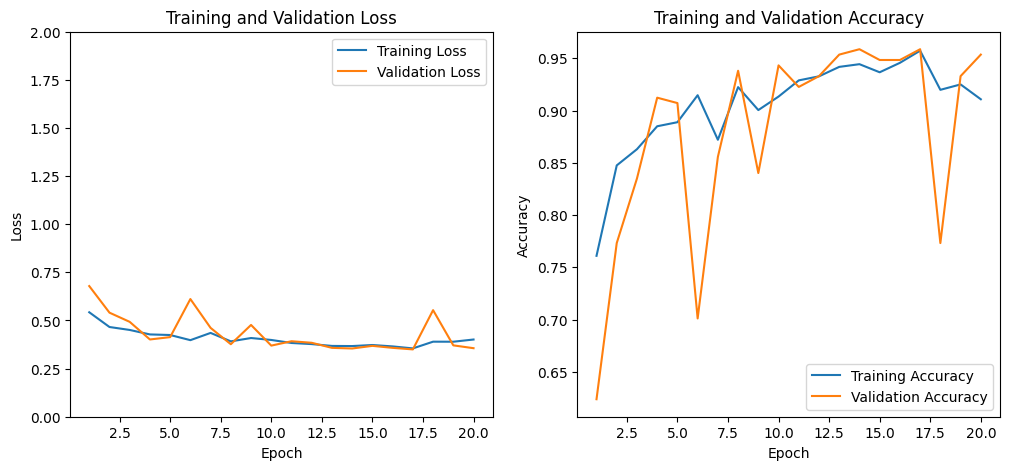

In [ ]:
# Visualize Loss and Accuracy

# Plot the training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, max_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, max_epochs+1), val_losses, label='Validation Loss')
plt.ylim(0, 2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, max_epochs+1), train_accs, label='Training Accuracy')
plt.plot(range(1, max_epochs+1), val_accs, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [ ]:
# Load the best model for evaluation
model.load_state_dict(torch.load(best_model_path))
_ = model.eval()

In [ ]:
# Use the validation dataset for evaluation (Or you can leave a test dataset for evaluation during data preparation)
y_pred = torch.tensor([], dtype=torch.float32, device=device)
y = torch.tensor([], dtype=torch.long, device=device)

for data in tqdm(val_loader):
    images, labels = data["image"].to(device), data["label"].to(device)
    outputs = model(images).detach()
    y_pred = torch.cat([y_pred, outputs], dim=0)
    y = torch.cat([y, labels], dim=0)

y_pred = y_pred.argmax(dim=1)
y = y.argmax(dim=1)

100%|██████████| 20/20 [00:02<00:00,  9.67it/s]


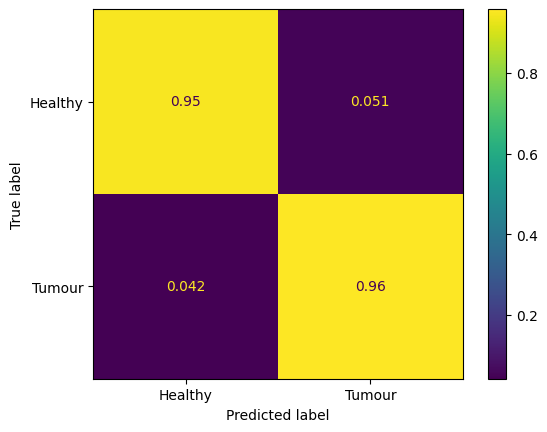

In [ ]:
# Visualize Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(
    y.cpu().numpy(),
    y_pred.cpu().numpy(),
    normalize='true',
)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Healthy", "Tumour"],
)
_ = disp.plot(ax=plt.subplots(1, 1, facecolor='white')[1])

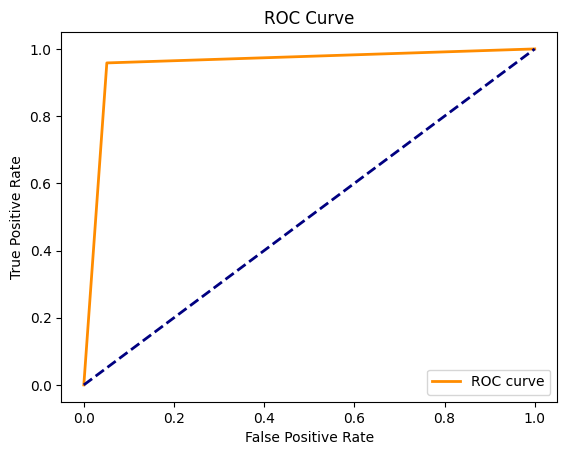

In [ ]:
# Visualize ROC Curve
from sklearn.metrics import roc_curve

# Calculate fpr and tpr
fpr, tpr, _ = roc_curve(y.cpu().numpy(), y_pred.cpu().numpy())
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

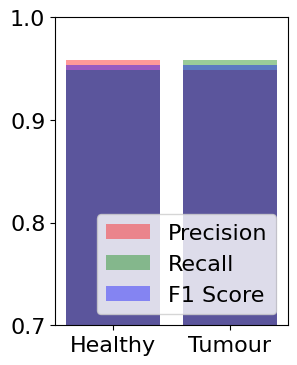

In [ ]:
# Visualize Precision, Recall and F1 Score
from sklearn.metrics import precision_recall_fscore_support

# Calculate the precision, recall, and F1 scores
precision, recall, f1_score, _ = precision_recall_fscore_support(y.cpu().numpy(), y_pred.cpu().numpy(), average=None)

# Define the labels for the two classes
plt.rcParams.update({'font.size': 16})
labels = ["Healthy", "Tumour"]

# Plot the precision, recall, and F1 scores
plt.figure(figsize=(3, 4))
plt.bar(labels, precision, color='r', alpha=0.4, label='Precision')
plt.bar(labels, recall, color='g', alpha=0.4, label='Recall')
plt.bar(labels, f1_score, color='b', alpha=0.4, label='F1 Score')
plt.ylim(0.7, 1)
plt.legend(loc='lower right') # place legend outside the figure
plt.show()

# 9. Test the model with some examples

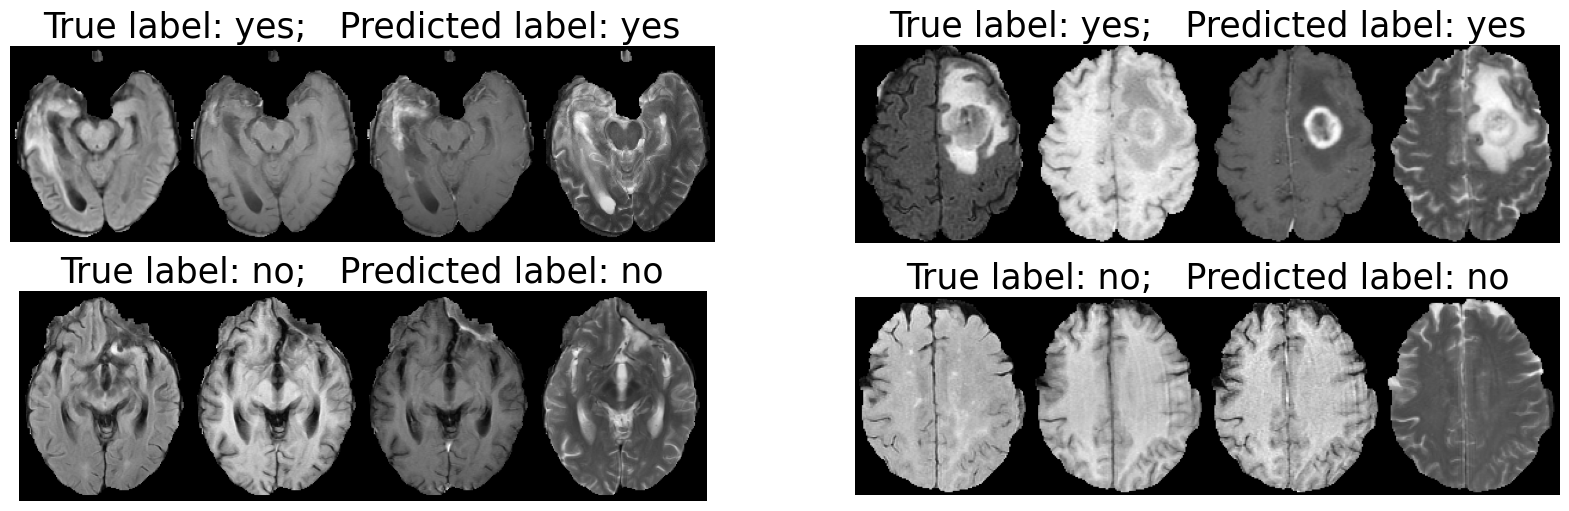

In [ ]:
nrow, ncol = 2, 2
num_files = nrow * ncol
files_to_visualize = np.random.choice(val_files, size=num_files, replace=False)
fig, axes = plt.subplots(nrow, ncol, figsize=(20, 6), facecolor='white')
for f, ax in zip(files_to_visualize, axes.flatten()):
    test_data = train_transforms(f)
    test_images, test_labels = test_data["image"], test_data["label"]
    test_images, test_labels = test_images.to(device).unsqueeze(0), test_labels.to(device).unsqueeze(0)
    with torch.no_grad():
      test_outputs = model(test_images)
      test_outputs = 1-torch.nn.Softmax(dim=1)(test_outputs).argmax(dim=1)
      # different modalities side by side
      img = np.concatenate(list(test_data["image"]), axis=1)
      im_show = ax.imshow(img, cmap="gray")
      ax.set_title(f"True label: {['yes', 'no'][test_data['label'][0]]};   Predicted label: {['yes', 'no'][test_outputs]}",fontsize = 25)
      ax.axis("off")